In [26]:
import pickle as pkl
from matplotlib import pyplot as plt
from collections import Counter
import os

In [ ]:
def count_scene_mentions(data):
    temp = []
    for scene in data:
        temp.append(len(scene['querySpans']))
    return temp

In [ ]:
fig, ax = plt.subplots(3, 3)

for i, file_name in enumerate(sorted(os.listdir("scenes/"))):
    with open('scenes/'+file_name, 'rb') as f:
        input = pkl.load(f)
        count = count_scene_mentions(input)
    ax[i//3, i%3].hist(count)
    ax[i//3, i%3].set_title(file_name.strip().split('.')[0])
    print(i, file_name, i//3, i%3)

In [38]:
def count_scene_mentions(data):
    temp = []
    for scene in data:
        temp.append(len(scene['querySpans']))
    return temp

In [39]:
with open('source_data/dev_tbbt.pkl', 'rb') as f:
    data = pkl.load(f)

count = count_scene_mentions(data)
counter = Counter(count)

TypeError: tuple indices must be integers or slices, not str

In [27]:
with open('source_data/dev_test.pkl', 'rb') as f:
    dev_test = pkl.load(f)

with open('source_data/train.pkl', 'rb') as f:
    train = pkl.load(f)

with open('source_data/extended_train.pkl', 'rb') as f:
    extended_train = pkl.load(f)

In [43]:

dev_test_count = count_scene_mentions(dev_test)
dev_test_counter = Counter(dev_test_count)

train_count = count_scene_mentions(train)
train_counter = Counter(train_count)

extended_train_count = count_scene_mentions(extended_train)
extended_train_counter = Counter(extended_train_count)

In [92]:
all_count = []
all_count.extend(train_count)
all_count.extend(extended_train_count)
all_count.extend(dev_test_count)

In [93]:
print(len(all_count))

2232


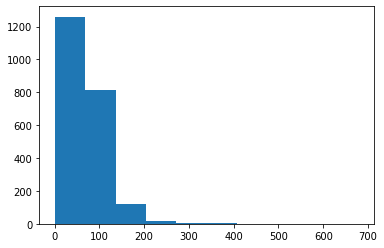

In [94]:
plt.hist(all_count)
plt.show()

In [63]:
def get_batches(all_counts):
    batches = []
    temp = []
    for item in all_counts:
        if sum(temp) + item > 270:
            batches.append(temp)
            temp = [item]
        else:
            temp.append(item)
    return batches

dev_test_batches = get_batches(dev_test_count)
train_batches = get_batches(train_count)
extended_train_batches = get_batches(extended_train_count)

In [224]:
all_batches = []
for item in dev_test_batches:
    all_batches.append(sum(item))
# for item in train_batches:
#     all_batches.append(sum(item))
# for item in extended_train_batches:
#     all_batches.append(sum(item))

3


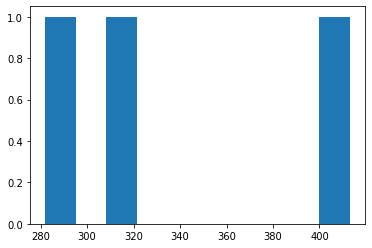

257.44444444444446
303


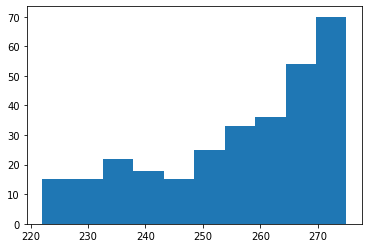

3


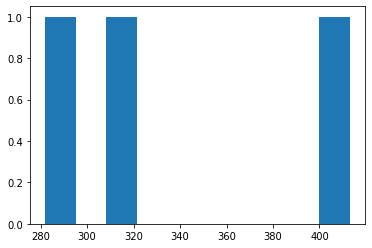

257.44444444444446


In [228]:
all_batches = []
# for item in dev_test_batches:
#     all_batches.append(sum(item))
for item in train_batches:
    all_batches.append(sum(item))
# for item in extended_train_batches:
#     all_batches.append(sum(item))

# Cut small batches
small = []
medium = []
large = []
for item in all_batches:
    if item <=125:
        small.append(item)
    elif item<=275:
        medium.append(item)
    else:
        large.append(item)

small.sort()
medium.sort()
large.sort()

for i in range(len(small)):
    item = small[len(small)-i-1]
    for j in range(len(medium)):
        target = medium[j]
        if target + item <= 275:
            medium[j] = target + item

print(len(medium))
plt.hist(medium)
plt.show()

print(len(large))
plt.hist(large)
plt.show()

print((sum(medium)+sum(large))/(len(medium)+len(large)))

In [223]:
print((247*148 + 257*306 + 247*279)/(148+306+279))

251.17462482946794


647


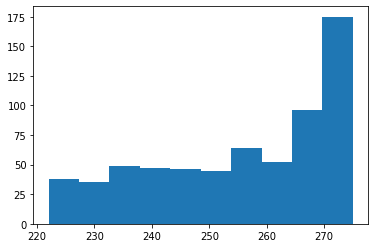

In [214]:
print(len(medium))
plt.hist(medium)
plt.show()

In [215]:
print(medium)

[250, 253, 257, 259, 261, 262, 265, 266, 266, 267, 267, 268, 270, 273, 274, 274, 274, 275, 275, 274, 275, 275, 275, 275, 274, 275, 275, 275, 274, 274, 275, 275, 275, 275, 274, 274, 274, 275, 270, 270, 270, 270, 270, 271, 272, 272, 274, 275, 275, 275, 275, 275, 275, 263, 264, 264, 265, 265, 266, 267, 267, 267, 267, 267, 268, 268, 269, 270, 270, 270, 271, 271, 271, 272, 272, 272, 272, 274, 274, 274, 275, 275, 264, 264, 265, 265, 266, 266, 266, 266, 266, 266, 266, 267, 267, 267, 268, 269, 269, 270, 270, 270, 270, 271, 271, 271, 271, 272, 272, 272, 273, 273, 274, 274, 274, 274, 274, 275, 275, 275, 275, 273, 273, 273, 273, 273, 273, 274, 274, 274, 274, 275, 274, 274, 275, 275, 275, 275, 275, 275, 265, 265, 265, 265, 265, 265, 265, 266, 266, 266, 266, 266, 266, 267, 267, 267, 268, 268, 268, 268, 268, 269, 269, 269, 270, 270, 270, 270, 270, 270, 270, 271, 271, 271, 271, 271, 271, 271, 272, 272, 272, 272, 272, 272, 272, 273, 273, 273, 273, 273, 274, 274, 274, 274, 274, 274, 275, 275, 275, 275,

In [216]:
for i in range(len(small)):
    item = small[len(small)-i-1]
    for j in range(len(medium)):
        target = medium[j]
        if target + item <= 275:
            medium[j] = target + item

In [217]:
print(medium)

[250, 253, 257, 259, 261, 262, 265, 266, 266, 267, 267, 268, 270, 273, 274, 274, 274, 275, 275, 274, 275, 275, 275, 275, 274, 275, 275, 275, 274, 274, 275, 275, 275, 275, 274, 274, 274, 275, 270, 270, 270, 270, 270, 271, 272, 272, 274, 275, 275, 275, 275, 275, 275, 263, 264, 264, 265, 265, 266, 267, 267, 267, 267, 267, 268, 268, 269, 270, 270, 270, 271, 271, 271, 272, 272, 272, 272, 274, 274, 274, 275, 275, 264, 264, 265, 265, 266, 266, 266, 266, 266, 266, 266, 267, 267, 267, 268, 269, 269, 270, 270, 270, 270, 271, 271, 271, 271, 272, 272, 272, 273, 273, 274, 274, 274, 274, 274, 275, 275, 275, 275, 273, 273, 273, 273, 273, 273, 274, 274, 274, 274, 275, 274, 274, 275, 275, 275, 275, 275, 275, 265, 265, 265, 265, 265, 265, 265, 266, 266, 266, 266, 266, 266, 267, 267, 267, 268, 268, 268, 268, 268, 269, 269, 269, 270, 270, 270, 270, 270, 270, 270, 271, 271, 271, 271, 271, 271, 271, 272, 272, 272, 272, 272, 272, 272, 273, 273, 273, 273, 273, 274, 274, 274, 274, 274, 274, 275, 275, 275, 275,

In [204]:
print(len(medium))
plt.hist(medium)
# plt.xlabel("Number of mentions in the Medium-Length batches")
plt.show()

73


1


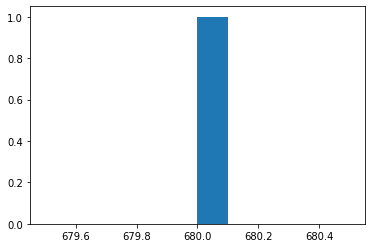

In [205]:
print(len(large))
plt.hist(large)
plt.show()

In [75]:
count = 0
for scene in train:
    for utt in scene['sentences']:
        count += len(utt)
for scene in extended_train:
    for utt in scene['sentences']:
        count += len(utt)
for scene in dev_test:
    for utt in scene['sentences']:
        count += len(utt)
print(count)

678873


In [78]:
678873/(1960+272)

304.1545698924731

In [79]:
print(train[0])

{'sentences': [['Monica', 'Geller', ':', 'You', 'guys', 'do', "n't", 'understand', '.', 'For', 'us', ',', 'kissing', 'is', 'as', 'important', 'as', 'any', 'part', 'of', 'it', '.'], ['Joey', 'Tribbiani', ':', 'Yeah', ',', 'right', '!'], ['Phoebe', 'Buffay', ':'], ['Rachel', 'Green', ':', 'All', 'you', 'need', 'to', 'know', 'is', 'in', 'the', 'first', 'kiss', '.'], ['Monica', 'Geller', ':', 'Absolutely', '.'], ['Chandler', 'Bing', ':', 'For', 'us', ',', 'kissing', "'s", 'an', 'opening', 'act', '..', 'like', 'the', 'comedian', 'you', 'have', 'to', 'sit', 'through', '..', 'before', 'Pink', 'Floyd', 'comes', 'out', '.'], ['Ross', 'Geller', ':', 'And', 'it', "'s", 'not', 'that', 'we', 'do', "n't", 'like', 'the', 'comedian', '.', 'It', "'s", 'just', 'that', 'that', "'s", 'not', 'why', 'we', 'bought', 'the', 'ticket', '.'], ['Chandler', 'Bing', ':', 'The', 'problem', 'is', ',', 'after', 'the', 'concert', ',', 'no', 'matter', 'how', 'great', 'the', 'show', 'was', 'you', 'girls', 'are', 'always'

In [82]:
mentions = []
for scene in train:
    for utt in scene['querySpans']:
        length = utt['endToken']-utt['startToken']
        mentions.append(length)
for scene in extended_train:
    for utt in scene['querySpans']:
        length = utt['endToken']-utt['startToken']
        mentions.append(length)
for scene in dev_test:
    for utt in scene['querySpans']:
        length = utt['endToken']-utt['startToken']
        mentions.append(length)

In [83]:
print(len(mentions))

154906


In [84]:
154906/1000

154.906

In [86]:
154906/(1960+272)

69.40232974910394

In [85]:
print(sum(mentions)/len(mentions))

1.4445986598324145


In [64]:
print(len(dev_test_count), len(dev_test_batches))
print(len(train_count), len(train_batches))
print(len(extended_train_count), len(extended_train_batches))

272 76
968 319
992 286


In [68]:
count = 0
for item in dev_test_batches:
    count += sum(item)
print(count/len(dev_test_batches))

count = 0
for item in train_batches:
    count += sum(item)
print(count/len(train_batches))

count = 0
for item in extended_train_batches:
    count += sum(item)
print(count/len(extended_train_batches))


count = 0
for item in dev_test_batches:
    count += sum(item)
for item in train_batches:
    count += sum(item)
for item in extended_train_batches:
    count += sum(item)
print(count/(len(extended_train_batches)+len(train_batches)+len(dev_test_batches)))

234.46052631578948
223.35109717868337
228.32867132867133
226.68135095447872


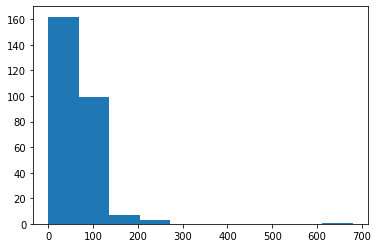

In [48]:
plt.hist(dev_test_count)
plt.show()

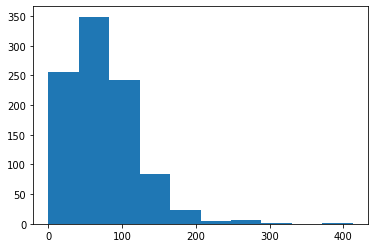

In [49]:
plt.hist(train_count)
plt.show()

In [47]:
plt.hist(extended_train_count)
plt.show()

In [24]:
# print(tbbt_counter)

for item in sorted(tbbt_counter):
    print(item, tbbt_counter[item])

0 2
1 4
2 5
3 3
4 4
5 1
6 3
7 2
8 8
10 7
11 4
12 4
13 7
14 6
15 5
16 2
17 3
18 6
19 4
20 1
21 7
22 8
23 7
24 4
25 4
26 5
27 7
28 3
29 8
30 7
31 6
32 4
33 9
34 5
35 9
36 11
37 8
38 9
39 8
40 10
41 7
42 12
43 8
44 8
45 10
46 10
47 10
48 8
49 11
50 16
51 9
52 9
53 15
54 10
55 7
56 5
57 8
58 18
59 11
60 9
61 9
62 6
63 5
64 13
65 11
66 12
67 10
68 13
69 10
70 7
71 11
72 10
73 13
74 10
75 13
76 10
77 7
78 12
79 10
80 11
81 9
82 5
83 6
84 7
85 8
86 5
87 10
88 9
89 14
90 13
91 6
92 3
93 11
94 1
95 12
96 8
97 3
98 7
99 6
100 6
101 13
102 4
103 4
104 3
105 4
106 9
107 5
108 7
109 6
110 5
111 6
112 4
113 5
114 2
115 2
116 7
117 3
118 4
119 3
120 3
121 4
122 6
123 4
124 6
125 2
126 3
127 3
128 2
129 2
130 6
131 2
132 2
133 1
134 2
135 2
136 2
137 5
138 2
140 1
142 4
143 1
144 2
145 1
146 3
148 1
149 1
150 3
151 4
152 2
153 1
154 1
155 3
156 1
159 1
160 2
163 2
164 1
166 2
167 2
168 1
171 1
175 1
177 1
178 1
180 1
181 1
183 1
184 1
190 1
191 1
192 2
199 1
200 1
201 2
205 1
206 1
222 1
227 1
228 1
2

In [30]:
print(sum(tbbt_count)+sum(extended_friends_count))

150376


In [17]:
print(len(tbbt_count))
print(len(tbbt))

998
998


In [11]:
for scene in tbbt:
    if len(scene['sentences'])==1:
        print(scene)
        print()
    # print(len(scene['sentences']))

{'sentences': [['Sheldon', ':', 'I', 'understand', 'why', 'no', 'one', 'else', 'bid', '.']], 'querySpans': [{'sentenceIndex': 0, 'startToken': 2, 'endToken': 3}, {'sentenceIndex': 0, 'startToken': 5, 'endToken': 7}], 'candidateSpans': [{'sentenceIndex': 0, 'startToken': 2, 'endToken': 3}, {'sentenceIndex': 0, 'startToken': 5, 'endToken': 7}], 'clickSpans': [{'sentenceIndex': 0, 'startToken': 2, 'endToken': 3}, {'sentenceIndex': 0, 'startToken': 5, 'endToken': 7}]}

{'sentences': [['Sheldon', ':', 'Correction', '.', 'Missy', 'can', 'date', 'whoever', 'she', 'wants', '.']], 'querySpans': [{'sentenceIndex': 0, 'startToken': 2, 'endToken': 3}, {'sentenceIndex': 0, 'startToken': 4, 'endToken': 5}, {'sentenceIndex': 0, 'startToken': 7, 'endToken': 8}, {'sentenceIndex': 0, 'startToken': 8, 'endToken': 9}], 'candidateSpans': [{'sentenceIndex': 0, 'startToken': 2, 'endToken': 3}, {'sentenceIndex': 0, 'startToken': 4, 'endToken': 5}, {'sentenceIndex': 0, 'startToken': 7, 'endToken': 8}, {'senten

In [65]:
with open('parallel_data/train_tbbt.pkl', 'rb') as f:
    data = pkl.load(f)

In [66]:
print(data[(1,1)][0])

[{'speaker': 'Sheldon', 'utterance': 'So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.', 'utterance_with_info': 'So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.', 'en_subtitles': "If a photon is directed through a plane with two slits in it and either is observed it will not go through both. If unobserved, it will. If it's observed after it left the plane, before it hits its target... it will not have gone through both slits.", 'zh_subtitles': '将光子正对平面上的双缝 观察任意一个隙缝 它不会穿过那两个隙缝 如果没被观察 那就会 总之 如果观察它在离开平面到击中目标之前 它就不会穿过那两个隙缝', 'fa_subtit

In [67]:
for utt in data[(1,1)][4]:
    print("speaker:", utt['speaker'])
    print("utterance:", utt['utterance'])
    print("en_subtitles:", utt['en_subtitles'])
    print("zh_subtitles:", utt['zh_subtitles'])
    print("fa_subtitles:", utt['fa_subtitles'])
    print()

speaker: Sheldon
utterance: I really think we should examine the chain of causality here.
en_subtitles: I really think we should examine the chain of causality here.
zh_subtitles: 我们得回顾下这起事件的前因后果
fa_subtitles: فکر کنم بهتره سلسله اتفاقات رو بررسي کنيم -لازمه؟

speaker: Leonard
utterance: Must we?
en_subtitles: Must we?
zh_subtitles: 一定要吗?
fa_subtitles: اتفاق اول

speaker: Sheldon
utterance: Event A. A beautiful woman stands naked in our shower. Event B. We drive half way across town to retrieve a television set from the aforementioned woman’s ex-boyfriend. Query, on what plane of existence is there even a semi-rational link between these events?
en_subtitles: Event A: A beautiful woman stands naked in our shower. Event B: We drive halfway across town to retrieve a television set from the aforementioned woman's ex-boyfriend. On what plane of existence is there even a semi-rational link between these events?
zh_subtitles: 事件A: 一个美女在我们的浴室裸体 事件B: 我们开车穿越整个小镇 就为了搬台电视机回来 目的地就在刚刚提到的美女的前男友家 提问:

In [71]:
for utt in data[(1,1)][2]:
    if utt['en_subtitles']!="":
        continue
    for x in utt:
        print(x, ":", utt[x])
    print()

speaker : Penny
utterance : Okay, thankyou.
utterance_with_info : Okay, thankyou.
en_subtitles : 
zh_subtitles : 
fa_subtitles : 
sm_noun_chunk : []
sm_pron : []
berkeley_noun_chunk : []
berkeley_pron : []
trf_noun_chunk : []
trf_pron : []

speaker : Penny
utterance : Holy smokes.
utterance_with_info : Holy smokes.
en_subtitles : 
zh_subtitles : 
fa_subtitles : 
sm_noun_chunk : []
sm_pron : []
berkeley_noun_chunk : []
berkeley_pron : []
trf_noun_chunk : []
trf_pron : []

speaker : Leonard
utterance : What?
utterance_with_info : What?
en_subtitles : 
zh_subtitles : 
fa_subtitles : 
sm_noun_chunk : []
sm_pron : []
berkeley_noun_chunk : []
berkeley_pron : []
trf_noun_chunk : []
trf_pron : []

speaker : Sheldon
utterance : Well.
utterance_with_info : Well.
en_subtitles : 
zh_subtitles : 
fa_subtitles : 
sm_noun_chunk : []
sm_pron : []
berkeley_noun_chunk : []
berkeley_pron : []
trf_noun_chunk : []
trf_pron : []

speaker : Sheldon
utterance : Fine. 
utterance_with_info : Fine. (Wanders in c

In [74]:
with open('scenes/train_tbbt.pkl', 'rb') as f:
    data = pkl.load(f)

In [75]:
for i in range(len(data)):
    if data[i]['scene_id']=='s01e01c02t':
        for x in data[i]['sentences']:
            print(" ".join(x))
        print()

Leonard : Okay , well , make yourself at home .
Penny : Okay , thankyou .
Leonard : Thank you . You 're very welcome .
Penny : This looks like some serious stuff . Leonard , did you do this ?
Sheldon : Actually , that 's my work .
Penny : Wow .
Sheldon : Yeah , well , it 's just some quantum mechanics with a little string theory doodling around the edges . That part 's just a joke . It 's a spoof of the Born - Oppenheimer approximation .
Penny : So you 're , like , one of those Beautiful Mind genius guys .
Sheldon : Yeah .
Penny : This is really impressive .
Leonard : I have a board , if you like boards . This is my board .
Penny : Holy smokes .
Sheldon : Holy smokes . If by " holy smokes , " you mean a derivative restatement of the stuff you can find scribbled on the wall of any men 's room at MIT , sure .
Leonard : What ?
Sheldon : Who has n't seen this differential below " here I sit brokenhearted " ?
Leonard : At least I did n't have to invent 26 dimensions just to make the math co

In [79]:
k = 4
for item in data[k]:
    print(item, ":", data[k][item])
    print()

sentences : [['Sheldon', ':', 'I', 'really', 'think', 'we', 'should', 'examine', 'the', 'chain', 'of', 'causality', 'here', '.'], ['Leonard', ':', 'Must', 'we', '?'], ['Sheldon', ':', 'Event', 'A', ':', 'A', 'beautiful', 'woman', 'stands', 'naked', 'in', 'our', 'shower', '.', 'Event', 'B', ':', 'We', 'drive', 'halfway', 'across', 'town', 'to', 'retrieve', 'a', 'television', 'set', 'from', 'the', 'aforementioned', 'woman', "'s", 'ex', '-', 'boyfriend', '.', 'On', 'what', 'plane', 'of', 'existence', 'is', 'there', 'even', 'a', 'semi', '-', 'rational', 'link', 'between', 'these', 'events', '?'], ['Leonard', ':', 'She', 'asked', 'me', 'to', 'do', 'her', 'a', 'favor', ',', 'Sheldon', '.'], ['Sheldon', ':', 'Well', ',', 'that', 'may', 'be', 'the', 'proximal', 'cause', 'of', 'our', 'journey', 'but', 'we', 'both', 'know', 'it', 'exists', 'in', 'contradistinction', 'to', 'the', 'higher', '-', 'level', 'distal', 'cause', '.'], ['Leonard', ':', 'Which', 'is', '?'], ['Sheldon', ':', 'You', 'think'

In [61]:
print(len(data))

11
